In [19]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [21]:
df= pd.read_csv(r"C:/Users/HP/Downloads/Auto Sales data.csv")

In [22]:
df.head(20)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,11/11/2018,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,18/11/2018,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,15/01/2019,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,20/02/2019,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,05/04/2019,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


In [23]:
day= "08/06/2020"
day=pd.to_datetime(day)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], dayfirst=True)

#recency = df.groupby('CustomerID').agg({'ORDERDATE': lambda x:{{day-x.max()}.days}})
Recency = df.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (day - x.max()).days
})
Recency.head(10)


,ORDERDATE
CUSTOMERNAME,
"AV Stores, Co.",263
Alpha Cognac,131
Amica Models & Co.,332
"Anna's Decorations, Ltd",150
Atelier graphique,255
"Australian Collectables, Ltd",89
"Australian Collectors, Co.",251
"Australian Gift Network, Co",186
Auto Assoc. & Cie.,300


In [24]:
Frequency=df.drop_duplicates(subset='ORDERNUMBER').groupby(['CUSTOMERNAME'])[['ORDERNUMBER']].count()
Frequency.head(5)

,ORDERNUMBER
CUSTOMERNAME,
"AV Stores, Co.",3
Alpha Cognac,3
Amica Models & Co.,2
"Anna's Decorations, Ltd",4
Atelier graphique,3


In [25]:
Monetary = (
    df.groupby('CUSTOMERNAME')[['SALES']]
    .sum() )
Monetary.head(5)

,SALES
CUSTOMERNAME,
"AV Stores, Co.",157807.81
Alpha Cognac,70488.44
Amica Models & Co.,94117.26
"Anna's Decorations, Ltd",153996.13
Atelier graphique,24179.96


In [26]:
RFM=pd.concat([recency,freq,monetary],axis=1)
Recency.columns=['RECENCY']
Frequency.columns=['FREQUENCY']
Monetary.columns=['MONETARY']

In [27]:
RFM.head(10)

,RECENCY,FREQUENCY,MONETARY
CUSTOMERNAME,,,
"AV Stores, Co.",263,3,157807.81
Alpha Cognac,131,3,70488.44
Amica Models & Co.,332,2,94117.26
"Anna's Decorations, Ltd",150,4,153996.13
Atelier graphique,255,3,24179.96
"Australian Collectables, Ltd",89,3,64591.46
"Australian Collectors, Co.",251,5,200995.41
"Australian Gift Network, Co",186,3,59469.12
Auto Assoc. & Cie.,300,2,64834.32


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled=scaler.fit_transform(RFM)

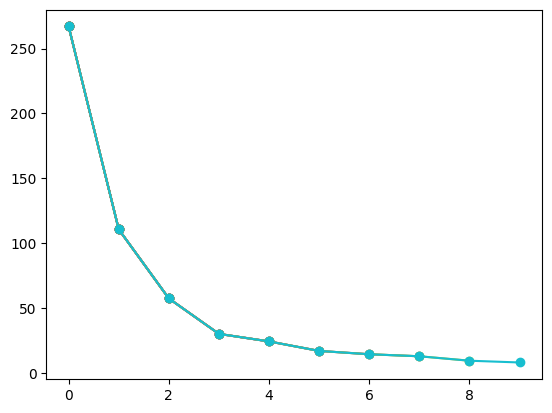

In [29]:
from sklearn.cluster import KMeans
inertia=[]
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    plt.plot(inertia,marker = 'o')

In [30]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_)


In [31]:
RFM

,RECENCY,FREQUENCY,MONETARY,Clusters
CUSTOMERNAME,,,,
"AV Stores, Co.",263,3,157807.81,0
Alpha Cognac,131,3,70488.44,2
Amica Models & Co.,332,2,94117.26,0
"Anna's Decorations, Ltd",150,4,153996.13,2
Atelier graphique,255,3,24179.96,0
...,...,...,...,...
"Vida Sport, Ltd",342,2,117713.56,0
Vitachrome Inc.,275,3,88041.26,0
"Volvo Model Replicas, Co",261,4,75754.88,0


In [39]:
group = RFM.groupby(["Clusters"])[["RECENCY","FREQUENCY","MONETARY"]].mean()
group

,RECENCY,FREQUENCY,MONETARY
Clusters,,,
0,337.916667,2.500000,81548.032917
1,68.000000,21.500000,783576.085000
2,143.384615,3.461538,109711.896410


### Customer Segmentation Function Explanation

The following function assigns customer segment names based on the cluster number:

- **Cluster 1 → "Avg.CX"**  
  Represents *Average Customers* who buy moderately and spend at an average level.  

- **Cluster 2 → "Whales"**  
  Represents *High-value Customers* who purchase frequently and generate the most revenue.  

- **Other Clusters → "Lapsed.CX"**  
  Represents *Inactive or Low-value Customers* who rarely purchase or have stopped engaging.  

This makes the cluster results more **human-readable** and useful for marketing analysis.

In [40]:
def func(row):
    if row["Clusters"]==1:
        return "Avg.CX"
    elif row["Clusters"]==2:
        return "Whales"
    else:
        return "Lapsed.CX"

In [41]:
RFM["Conditions"]=RFM.apply(func,axis=1)

In [42]:
RFM

,RECENCY,FREQUENCY,MONETARY,Clusters,Conditions
CUSTOMERNAME,,,,,
"AV Stores, Co.",263,3,157807.81,0,Lapsed.CX
Alpha Cognac,131,3,70488.44,2,Whales
Amica Models & Co.,332,2,94117.26,0,Lapsed.CX
"Anna's Decorations, Ltd",150,4,153996.13,2,Whales
Atelier graphique,255,3,24179.96,0,Lapsed.CX
...,...,...,...,...,...
"Vida Sport, Ltd",342,2,117713.56,0,Lapsed.CX
Vitachrome Inc.,275,3,88041.26,0,Lapsed.CX
"Volvo Model Replicas, Co",261,4,75754.88,0,Lapsed.CX


In [43]:
results=RFM["Conditions"].value_counts()

In [44]:
results

Conditions
Lapsed.CX    48
Whales       39
Avg.CX        2
Name: count, dtype: int64

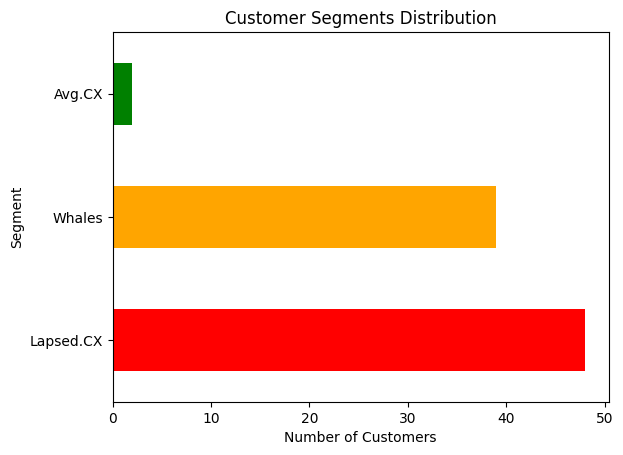

In [ ]:
results.plot(kind='barh', color=['red','orange','green'])
import matplotlib.pyplot as plt
plt.title("Customer Segments Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("Segment")
plt.show()